In [0]:
### 데이터 분석 기본 라이브러리 ---------------------------------------------------------------------
import pandas as pd
import numpy as np

### 시각화 관련 ------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib # 그래프 inline 결과창에 바로 출력
%matplotlib inline

import seaborn as sns
sns.set_palette('pastel') # 색깔 팔레트 설정

### 데이터 전처리 ----------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split # 학습용/평가용 데이터 분리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

### 기본 통계 분석 ---------------------------------------------------------------------------------
from scipy import stats # scientific python : 각종 수학, 통계 관련 라이브러리

## 1집단 검정 
from statsmodels.stats.proportion import proportions_ztest # 비율 z검정

## 2집단 검정
from scipy.stats import mannwhitneyu # 비모수검정

## 3집단 이상 검정
from scipy.stats import kruskal # 비모수검정

## 회귀분석
import statsmodels.formula.api as smf # 선형회귀모델 formula 사용 
from statsmodels.api import qqplot, add_constant # 잔차의 정규성 확인 : qqplot, 회귀분석의 상수항 추가 = add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 확인
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # 선형회귀모형, 능형(릿지), 라쏘, 엘라스틱넷
from sklearn.feature_selection import RFE # 변수선택법 : 후진제거법
from sklearn.metrics import r2_score # 회귀 평가함수 : 결정계수

### 예측/회귀모델 ------------------------------------------------------------------------------------
## 의사결정나무/랜덤포레스트 
from sklearn.tree import DecisionTreeRegressor # decision tree 모델
from sklearn.model_selection import GridSearchCV # 최적 모델, parameter 탐색

# 나무 구조 시각화
# import graphviz
from sklearn.tree import export_graphviz # 그래프 저장용 텍스트 파일 포맷인 .dot 생성 저장

from sklearn.ensemble import RandomForestRegressor # 예측/회귀 Random Forest

from sklearn.ensemble import GradientBoostingRegressor # 예측/회귀 그래디언트 부스팅 
from sklearn.metrics import mean_squared_error, mean_absolute_error # 평가함수

### 군집분석-----------------------------------------------------------------------------------------------
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

### 한글 폰트 적용 - 리눅스 -------------------------------------------------------------------------------
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = "NanumGothic"
matplotlib.rcParams['axes.unicode_minus'] = False

### 한글 폰트 적용 - 윈도우 --------------------------------------------------------------------------------
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

### 경고문 생략 -------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings(action = 'ignore')

['NanumGothic']


# 데이터 전처리

In [1]:
raw1 = pd.read_csv("01_Data_set_대출.csv", encoding = 'euc=kr')
raw2 = pd.read_csv("01_Data_set_보험.csv", encoding = 'euc-kr')
print(raw1.shape, raw2.shape)

(100233, 16) (100233, 39)


In [2]:
df_raw = pd.merge(raw1, raw2, left_on = 'CUST_ID', right_on = 'CUST_ID' )

In [3]:
df_raw

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
0,1,0,1,0,0,0,9001,9001,9001,0,...,20000000,20000000,0,0,10,0,0,0,50,1
1,2,0,1,0,0,0,24001,0,24001,0,...,7000000,36000000,0,0,0,300000,2,5,50,1
2,3,0,0,1,3,2,15001,9001,0,3001,...,11000000,11000000,0,0,0,0,0,2,60,2
3,4,1,0,2,4,2,6001,3001,0,3001,...,4000000,4000000,0,0,0,0,0,1,35,1
4,5,0,4,0,0,0,21001,15001,21001,0,...,4000000,4000000,0,0,0,500000,2,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,58000000,70000000,0,0,1,700000,0,3,55,2
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,37000000,45000000,0,0,0,100000,0,3,45,2
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,45000000,54000000,0,0,1,0,0,4,45,1
100231,102251,0,0,0,1,1,57001,0,0,0,...,1000000,1000000,0,0,0,0,0,0,45,1


In [4]:
df = df_raw.copy()
df.shape

(100233, 54)

## 대출정보 현재 총 금액 < 대출정보 현재 총 금액(은행) + 대출정보 현재 총 금액(카드사/할부사/캐피탈) 데이터 삭제

In [5]:
print(len(df[df['TOT_LNIF_AMT'] - (df['BNK_LNIF_AMT'] + df['CPT_LNIF_AMT']) < -2]))
df.drop(df[df['TOT_LNIF_AMT'] - (df['BNK_LNIF_AMT'] + df['CPT_LNIF_AMT']) < -2].index, axis = 0, inplace = True)
df.shape

45


(100188, 54)

## OCCP_NAME_G : *표시(1189) -> null까지 합해서 알 수 없음으로 묶기

In [6]:
len(df[df['OCCP_NAME_G'] == '*']) + df['OCCP_NAME_G'].isnull().sum()

1650

In [7]:
df['OCCP_NAME_G'].fillna('정보없음', inplace = True)

In [8]:
df['OCCP_NAME_G'].replace('*', '정보없음', inplace = True)

In [9]:
df['OCCP_NAME_G'].value_counts()

주부          27553
사무직         16573
2차산업 종사자     9596
자영업          9481
3차산업 종사자     8272
공무원          5090
전문직          5043
단순 사무직       4105
학생           3833
운전직          2124
기타           1671
정보없음         1650
고소득 전문직      1223
1차산업 종사자     1177
기업/단체 임원     1041
예체능계 종사자      935
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

## (직업(OCCP_NAME_G) != 주부, 학생, 기타) & (소득(CUST_JOB_INCM) == 0) - 직업별 소득 0 제외 중앙값

In [10]:
print(len(df[(~df['OCCP_NAME_G'].isin(['주부', '학생', '기타'])) & (df['CUST_JOB_INCM'] == 0)]))
# df.drop(df[(~df['OCCP_NAME_G'].isin(['주부', '학생', '기타'])) & (df['CUST_JOB_INCM'] == 0)].index, axis = 0, inplace = True)
df.shape

7341


(100188, 54)

In [11]:
# Calculate median by OCCP_NAME_G
median_by_occup = df.groupby('OCCP_NAME_G')['CUST_JOB_INCM'].median()

# Replace CUST_JOB_INCM with median for OCCP_NAME_G groups where OCCP_NAME_G != ['주부', '학생', '기타'] and CUST_JOB_INCM == 0
df.loc[(~df['OCCP_NAME_G'].isin(['주부', '학생', '기타'])) & (df['CUST_JOB_INCM'] == 0), 'CUST_JOB_INCM'] = df.loc[(~df['OCCP_NAME_G'].isin(['주부', '학생', '기타'])) & (df['CUST_JOB_INCM'] == 0), 'OCCP_NAME_G'].map(median_by_occup)

# 확인
df[df['CUST_JOB_INCM'] == 0]['OCCP_NAME_G'].value_counts()

주부    27504
학생     3806
기타     1671
Name: OCCP_NAME_G, dtype: int64

In [12]:
# df.groupby('OCCP_NAME_G').apply(lambda x : x.sort_values(by='CUST_JOB_INCM').head(5))['CUST_JOB_INCM']

In [13]:
# pd.DataFrame(df.groupby('OCCP_NAME_G').apply(lambda x : x.sort_values(by='CUST_JOB_INCM'))['CUST_JOB_INCM']).index

In [14]:
# pd.DataFrame(df.groupby('OCCP_NAME_G')['CUST_JOB_INCM'])[lambda x : x[0]=='공무원'][1].values[0]

## 직업기반추정소득(CUST_JOB_INCM) > 가계합산추정소득(HSHD_INFR_INCM) - 둘 중 max로 대체 : 가계합산추정소득만 남김 ~ TOT_INCM_drvd

In [15]:
print(len(df[df['CUST_JOB_INCM'] > df['HSHD_INFR_INCM']]))
df.shape

2780


(100188, 54)

In [16]:
df['TOT_INCM_drvd'] = df[['CUST_JOB_INCM', 'HSHD_INFR_INCM']].max(axis = 1)
df.drop(['CUST_JOB_INCM', 'HSHD_INFR_INCM'], axis = 1, inplace = True)
df.shape

(100188, 53)

## (실가족원수(ACTL_FMLY_NUM) == 1명) & (배우자 직업(MATE_OCCP_NAME_G) 존재) 삭제

In [17]:
print(len((df[(df['ACTL_FMLY_NUM'] == 1) & (~df['MATE_OCCP_NAME_G'].isnull())])))
df.drop(df[(df['ACTL_FMLY_NUM'] == 1) & (~df['MATE_OCCP_NAME_G'].isnull())].index, axis = 0, inplace = True)
df.shape

3


(100185, 53)

## (실가족원수(ACTL_FMLY_NUM) == 2명) & (배우자 직업(MATE_OCCP_NAME_G) 존재) & (막내 자녀 나이(LAST_CHLD_AGE) > 0) 삭제

In [18]:
print(len((df[(df['ACTL_FMLY_NUM'] == 2) & (~df['MATE_OCCP_NAME_G'].isnull()) & (df['LAST_CHLD_AGE'] > 0)])))
df.drop(df[(df['ACTL_FMLY_NUM'] == 2) & (~df['MATE_OCCP_NAME_G'].isnull()) & (df['LAST_CHLD_AGE'] > 0)].index, axis = 0, inplace = True)
df.shape

2


(100183, 53)

## MATE_OCCP_NAME_G : 결측 비율 매우 높으므로 변수 제외

In [19]:
df.drop('MATE_OCCP_NAME_G', axis = 1, inplace = True)

In [20]:
df.shape

(100183, 52)

## (보험금 청구 건수 = 0) & (보험금 지급 총액 존재) 경우 - 보험금 지급 총액이 건수보다 더 많은 정보의 영향을 줄 것으로 생각해서 건수를 제외하고 지급 총액만 사용

In [21]:
len(df[['FMLY_CLAM_CNT', 'FYCM_PAID_AMT']][(df['FMLY_CLAM_CNT'] == 0) & (df['FYCM_PAID_AMT'] > 0)])

7539

In [22]:
df.drop('FMLY_CLAM_CNT', axis = 1, inplace = True)
df.shape

(100183, 51)

## GDINS_MON_PREM, FMLY_GDINS_MNPREM - 9999 삭제

In [23]:
df.drop(df[df['GDINS_MON_PREM'] == 9999].index, axis = 0, inplace = True)

In [24]:
df.drop(df[df['FMLY_GDINS_MNPREM'] == 9999].index, axis = 0, inplace = True)

In [25]:
df.shape

(100068, 51)

## 전체 결측값 drop

In [26]:
df.isnull().sum()

CUST_ID                 0
TARGET                  0
BNK_LNIF_CNT            0
CPT_LNIF_CNT            0
SPART_LNIF_CNT          0
ECT_LNIF_CNT            0
TOT_LNIF_AMT            0
TOT_CLIF_AMT            0
BNK_LNIF_AMT            0
CPT_LNIF_AMT            0
CRDT_OCCR_MDIF          0
SPTCT_OCCR_MDIF         0
CRDT_CARD_CNT           0
CTCD_OCCR_MDIF          0
CB_GUIF_CNT             0
CB_GUIF_AMT             0
OCCP_NAME_G             0
ACTL_FMLY_NUM           0
CUST_FMLY_NUM           0
LAST_CHLD_AGE        1025
MATE_JOB_INCM           0
CRDT_LOAN_CNT           0
MIN_CNTT_DATE           0
TOT_CRLN_AMT            0
TOT_REPY_AMT            0
CRLN_OVDU_RATE          0
CRLN_30OVDU_RATE        0
LT1Y_CLOD_RATE          0
STRT_CRDT_GRAD          0
LTST_CRDT_GRAD          0
PREM_OVDU_RATE          0
LT1Y_PEOD_RATE          0
AVG_STLN_RATE           0
STLN_REMN_AMT           0
LT1Y_STLN_AMT           0
LT1Y_SLOD_RATE          0
GDINS_MON_PREM          0
SVINS_MON_PREM          0
FMLY_GDINS_M

In [27]:
df.dropna(inplace = True)
df.shape

(99043, 51)

In [28]:
print("drop 비율은 : {}".format((100233-99158)/100233 * 100))

drop 비율은 : 1.0725010725010726


## 무의미한 변수 SEX 삭제

In [29]:
df.drop('SEX', axis = 1, inplace = True)
df.shape

(99043, 50)

## 단위 스케일링 1 : 만 단위 - 0.1 스케일링(천 단위로)
* CUST_JOB_INCM, HSHD_INFR_INCM 는 삭제
* TOT_INCM_drvd, MATE_JOB_INCM

In [30]:
df[['TOT_INCM_drvd', 'MATE_JOB_INCM']].describe()

,TOT_INCM_drvd,MATE_JOB_INCM
count,99043.000000,99043.000000
mean,6952.646830,1706.033743
std,2911.574444,2453.475937
min,0.000000,0.000000
25%,4800.000000,0.000000
50%,6600.000000,0.000000
75%,9200.000000,4400.000000
max,20000.000000,10000.000000


In [31]:
df['TOT_INCM_drvd'] = df['TOT_INCM_drvd'] * 10
df['MATE_JOB_INCM'] = df['MATE_JOB_INCM'] * 10

In [32]:
df[['TOT_INCM_drvd', 'MATE_JOB_INCM']].describe()

,TOT_INCM_drvd,MATE_JOB_INCM
count,99043.000000,99043.000000
mean,69526.468302,17060.337429
std,29115.744439,24534.759374
min,0.000000,0.000000
25%,48000.000000,0.000000
50%,66000.000000,0.000000
75%,92000.000000,44000.000000
max,200000.000000,100000.000000


## 단위 스케일링 1 : 원 단위 - 0.001 스케일링(천 단위로)
* TOT_CRLN_AMT, TOT_REPY_AMT, STLN_REMN_AMT, LT1Y_STLN_AMT, GDINS_MON_PREM, SVINS_MON_PREM, FMLY_GDINS_MNPREM, FMLY_SVINS_MNPREM, MAX_MON_PREM, TOT_PREM, FMLY_TOT_PREM, FYCM_PAID_AMT

In [33]:
df[['TOT_CRLN_AMT', 'TOT_REPY_AMT', 'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'GDINS_MON_PREM', 'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 
    'FMLY_SVINS_MNPREM', 'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'FYCM_PAID_AMT']].describe()

,TOT_CRLN_AMT,TOT_REPY_AMT,STLN_REMN_AMT,LT1Y_STLN_AMT,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,FYCM_PAID_AMT
count,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04,9.904300e+04
mean,1.186838e+06,8.722474e+05,1.608342e+06,9.299395e+05,1.278234e+05,9.157316e+04,1.839067e+05,1.353834e+05,3.725648e+05,2.060784e+07,3.051774e+07,4.039330e+06
std,5.330996e+06,4.376060e+06,5.786210e+06,5.767218e+06,2.346149e+05,3.144181e+05,3.178767e+05,4.967319e+05,6.996788e+05,4.433047e+07,6.337024e+07,1.458617e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+04,5.000000e+06,6.000000e+06,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04,0.000000e+00,8.000000e+04,0.000000e+00,1.900000e+05,1.100000e+07,1.500000e+07,3.000000e+05
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+05,0.000000e+00,2.300000e+05,1.000000e+05,3.900000e+05,2.300000e+07,3.400000e+07,1.900000e+06
max,1.010000e+08,1.010000e+08,1.010000e+08,1.010000e+08,4.000000e+06,4.000000e+06,4.000000e+06,1.000000e+07,1.000000e+07,1.000000e+09,1.000000e+09,3.001000e+08


In [34]:
df['TOT_CRLN_AMT'] = df['TOT_CRLN_AMT'] * 0.001 
df['TOT_REPY_AMT'] = df['TOT_REPY_AMT'] * 0.001 
df['STLN_REMN_AMT'] = df['STLN_REMN_AMT'] * 0.001 
df['LT1Y_STLN_AMT'] = df['LT1Y_STLN_AMT'] * 0.001 
df['GDINS_MON_PREM'] = df['GDINS_MON_PREM'] * 0.001 
df['SVINS_MON_PREM'] = df['SVINS_MON_PREM'] * 0.001 
df['FMLY_GDINS_MNPREM'] = df['FMLY_GDINS_MNPREM'] * 0.001 
df['FMLY_SVINS_MNPREM'] = df['FMLY_SVINS_MNPREM'] * 0.001 
df['MAX_MON_PREM'] = df['MAX_MON_PREM'] * 0.001 
df['TOT_PREM'] = df['TOT_PREM'] * 0.001 
df['FMLY_TOT_PREM'] = df['FMLY_TOT_PREM'] * 0.001 
df['FYCM_PAID_AMT'] = df['FYCM_PAID_AMT'] * 0.001 

In [35]:
df[['TOT_CRLN_AMT', 'TOT_REPY_AMT', 'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'GDINS_MON_PREM', 'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 
    'FMLY_SVINS_MNPREM', 'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'FYCM_PAID_AMT']].describe()

,TOT_CRLN_AMT,TOT_REPY_AMT,STLN_REMN_AMT,LT1Y_STLN_AMT,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,FYCM_PAID_AMT
count,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000,99043.000000
mean,1186.838040,872.247408,1608.341831,929.939521,127.823370,91.573155,183.906687,135.383419,372.564845,20607.837000,30517.744818,4039.330392
std,5330.995645,4376.060045,5786.209676,5767.218310,234.614855,314.418118,317.876737,496.731909,699.678754,44330.465504,63370.243828,14586.167229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,5000.000000,6000.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,80.000000,0.000000,190.000000,11000.000000,15000.000000,300.000000
75%,0.000000,0.000000,0.000000,0.000000,160.000000,0.000000,230.000000,100.000000,390.000000,23000.000000,34000.000000,1900.000000
max,101000.000000,101000.000000,101000.000000,101000.000000,4000.000000,4000.000000,4000.000000,10000.000000,10000.000000,1000000.000000,1000000.000000,300100.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99043 entries, 0 to 100232
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            99043 non-null  int64  
 1   TARGET             99043 non-null  int64  
 2   BNK_LNIF_CNT       99043 non-null  int64  
 3   CPT_LNIF_CNT       99043 non-null  int64  
 4   SPART_LNIF_CNT     99043 non-null  int64  
 5   ECT_LNIF_CNT       99043 non-null  int64  
 6   TOT_LNIF_AMT       99043 non-null  int64  
 7   TOT_CLIF_AMT       99043 non-null  int64  
 8   BNK_LNIF_AMT       99043 non-null  int64  
 9   CPT_LNIF_AMT       99043 non-null  int64  
 10  CRDT_OCCR_MDIF     99043 non-null  int64  
 11  SPTCT_OCCR_MDIF    99043 non-null  int64  
 12  CRDT_CARD_CNT      99043 non-null  int64  
 13  CTCD_OCCR_MDIF     99043 non-null  int64  
 14  CB_GUIF_CNT        99043 non-null  int64  
 15  CB_GUIF_AMT        99043 non-null  int64  
 16  OCCP_NAME_G        99

## 비연금저축상품월납입보험료(GDINS_MON_PREM) > 가구비연금저축상품월납입보험료(FMLY_GDINS_MNPREM) - 둘 중 max로 대체 : 가구비연금저축상품월납보험료만 남김 ~ FMLY_GDINS_MNPREM_drvd

In [37]:
print(len(df[df['GDINS_MON_PREM'] > df['FMLY_GDINS_MNPREM']]))
df.shape

0


(99043, 50)

In [38]:
df['FMLY_GDINS_MNPREM_drvd'] = df[['GDINS_MON_PREM', 'FMLY_GDINS_MNPREM']].max(axis = 1)
df.drop(['GDINS_MON_PREM', 'FMLY_GDINS_MNPREM'], axis = 1, inplace = True)
df.shape

(99043, 49)

## 연금저축상품월납입보험료(SVINS_MON_PREM) > 가구연금저축상품월납입보험료(FMLY_SVINS_MNPREM) - 둘 중 max로 대체 : 가구연금저축상품월납보험료만 남김 ~ FMLY_SVINS_MNPREM_drvd

In [39]:
print(len(df[df['SVINS_MON_PREM'] > df['FMLY_SVINS_MNPREM']]))
df.shape

0


(99043, 49)

In [40]:
df['FMLY_SVINS_MNPREM_drvd'] = df[['SVINS_MON_PREM', 'FMLY_SVINS_MNPREM']].max(axis = 1)
df.drop(['SVINS_MON_PREM', 'FMLY_SVINS_MNPREM'], axis = 1, inplace = True)
df.shape

(99043, 48)

## 연령(AGE) * 표시 된 것 지우기

In [41]:
len(df[df['AGE'] == '*'])

162

In [42]:
df.drop(df[df['AGE'] == '*'].index, axis = 0, inplace = True)
df.shape

(98881, 48)

## 제거 비율

In [43]:
print("전처리 후 관측치 제거 비율은 {}".format((len(df_raw) - len(df))/len(df_raw)))

전처리 후 관측치 제거 비율은 0.013488571628106513


# 군집분석

## 데이터 표준화

In [44]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [45]:
df.columns

Index(['TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'ACTL_FMLY_NUM', 'CUST_FMLY_NUM', 'LAST_CHLD_AGE', 'MATE_JOB_INCM',
       'CRDT_LOAN_CNT', 'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT',
       'CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE',
       'STRT_CRDT_GRAD', 'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE',
       'AVG_STLN_RATE', 'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_PLPY_CNT',
       'AGE', 'TOT_INCM_drvd', 'FMLY_GDINS_MNPREM_drvd',
       'FMLY_SVINS_MNPREM_drvd'],
      dtype='object')

In [46]:
nums = ['TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT', 'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CTCD_OCCR_MDIF',
        'CB_GUIF_AMT', 'LAST_CHLD_AGE', 'MATE_JOB_INCM', 'PREM_OVDU_RATE', 'AVG_STLN_RATE', 'STLN_REMN_AMT', 
        'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM',  'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 
        'FMLY_PLPY_CNT', 'TOT_INCM_drvd', 'FMLY_GDINS_MNPREM_drvd', 'FMLY_SVINS_MNPREM_drvd']

cats = ['TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT', 'CRDT_CARD_CNT', 'CB_GUIF_CNT', 'OCCP_NAME_G',
       'ACTL_FMLY_NUM', 'CUST_FMLY_NUM', 'CRDT_LOAN_CNT',  'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE', 
        'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE',  'STRT_CRDT_GRAD', 'LTST_CRDT_GRAD', 'CNTT_LAMT_CNT', 'LT1Y_CTLT_CNT', 'AGE', 'LT1Y_PEOD_RATE']

# datetime = ['입원일자', '퇴원일자']

In [47]:
#######

In [48]:
from sklearn.preprocessing import StandardScaler

# 수치형 열에 StandardScaler 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[nums])
df_scaled_numeric = pd.DataFrame(scaled_data, columns=nums)
df_scaled_numeric.reset_index(drop = True, inplace = True)

# 범주형 열에 원-핫 인코딩 적용
df_categorical = pd.get_dummies(df[cats], drop_first=True)
df_categorical.reset_index(drop = True, inplace = True)

# 전처리된 데이터 결합
# df_preprocessed = pd.concat([df_scaled_numeric, df_categorical], axis=1)
df_preprocessed = df_scaled_numeric.join(df_categorical)
df_preprocessed 

,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CTCD_OCCR_MDIF,CB_GUIF_AMT,LAST_CHLD_AGE,MATE_JOB_INCM,...,AGE_65,AGE_70,LT1Y_PEOD_RATE_10미만,LT1Y_PEOD_RATE_20미만,LT1Y_PEOD_RATE_30미만,LT1Y_PEOD_RATE_40미만,LT1Y_PEOD_RATE_50미만,LT1Y_PEOD_RATE_60미만,LT1Y_PEOD_RATE_90미만,LT1Y_PEOD_RATE_90이상
0,-0.590882,-0.292281,-0.447711,-0.323759,-0.587009,-0.487947,-1.863345,5.245164,0.841599,-0.696099,...,0,0,0,1,0,0,0,0,0,0
1,-0.472506,-0.401328,-0.289450,-0.323759,-0.621375,-0.487947,0.714435,-0.116810,1.199653,-0.696099,...,0,0,0,0,0,0,0,0,0,0
2,-0.543532,-0.292281,-0.542678,-0.090154,-0.587009,0.383188,0.714435,-0.116810,1.557706,-0.696099,...,0,0,0,0,0,0,0,0,0,0
3,-0.614557,-0.364970,-0.542678,-0.090154,-0.587009,0.383188,-0.717665,-0.116810,-0.877059,-0.696099,...,0,0,0,0,0,0,0,0,0,0
4,-0.496181,-0.219591,-0.321102,-0.323759,-0.587009,-0.487947,0.141595,-0.116810,0.125491,-0.696099,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98876,-0.070029,-0.219591,0.058725,-0.323759,0.650166,3.310201,0.714435,-0.116810,1.557706,-0.696099,...,0,0,1,0,0,0,0,0,0,0
98877,-0.235755,-0.292281,0.027073,-0.323759,2.299732,-0.487947,0.714435,-0.116810,0.483545,1.422508,...,0,0,0,0,0,0,0,0,0,0
98878,-0.448831,-0.074211,-0.257798,-0.323759,-0.587009,-0.487947,0.714435,-0.116810,0.125491,1.585478,...,0,0,0,0,0,0,0,0,0,0
98879,-0.212080,-0.401328,-0.542678,-0.323759,-0.587009,-0.453101,0.714435,-0.116810,-0.877059,-0.696099,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# pd.set_option('display.max_rows', None)

## 군집화

In [50]:
n_iter_cluster = 20
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus, random_state = 654)
    clus.fit(df_preprocessed)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, 'Error':clus_error})
ds_error

,NumberofCluster,Error
0,1,3.591020e+14
1,2,2.751782e+12
2,3,1.208877e+12
3,4,6.991552e+11
4,5,5.148982e+11
5,6,3.889687e+11
6,7,3.244639e+11
7,8,2.718724e+11
8,9,2.279788e+11
9,10,1.944714e+11


In [51]:
# clus = KMeans(5, random_state = 654)
clus = KMeans(5, random_state = 654)

clus.fit(df_preprocessed)
cluster_kmeans=[i+1 for i in clus.labels_]
df_preprocessed['ClusterKmeans'] = cluster_kmeans
# df_preprocessed.head()
# ds_summary_km = df_preprocessed.groupby('ClusterKmeans').agg(['min', 'mean', 'max'])
# level0 = ds_summary_km.columns.get_level_values(0)
# level1 = ds_summary_km.columns.get_level_values(1)
# ds_summary_km.columns= level0 + '_' + level1
# ds_summary_km.reset_index(inplace = True)
# ds_summary_km.round(3)

In [52]:
from scipy import stats
df_chi = pd.DataFrame(df_preprocessed.groupby('ClusterKmeans')['TARGET'].value_counts())
df_pivot = df_chi.rename(columns={"TARGET":"count"}).reset_index().pivot_table(values='count', index='TARGET', columns='ClusterKmeans')
display(df_pivot)

chi,pval,dof,expected=stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:.3f}".format(chi))
print('p:{0:.3f}'.format(pval))
print()
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

ClusterKmeans,1,2,3,4,5
TARGET,,,,,
0,85317,6779,517,1963,71
1,3788,336,17,86,7


chi-square test
chisq:9.372
p:0.052

degree pf freedom: 4
expected value: 
[[8.528960e+04 6.810342e+03 5.111350e+02 1.961264e+03 7.466000e+01]
 [3.815400e+03 3.046580e+02 2.286500e+01 8.773600e+01 3.340000e+00]]


In [53]:
# 원 데이터에 군집 그룹 변수 붙인 거
df_Cluster = df.reset_index().join(df_preprocessed['ClusterKmeans'])
df_Cluster['ClusterKmeans'].value_counts()

1    89105
2     7115
4     2049
3      534
5       78
Name: ClusterKmeans, dtype: int64

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_preprocessed)

In [55]:
df_Cluster['pca_x'] = pca_transformed[:,0]
df_Cluster['pca_y'] = pca_transformed[:,1]
df_Cluster.head(3)

,index,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_PLPY_CNT,AGE,TOT_INCM_drvd,FMLY_GDINS_MNPREM_drvd,FMLY_SVINS_MNPREM_drvd,ClusterKmeans,pca_x,pca_y
0,0,0,1,0,0,0,9001,9001,9001,0,...,10,0.0,0,50,77000,190.0,0.0,1,-19884.359171,10.866373
1,1,0,1,0,0,0,24001,0,24001,0,...,0,300.0,5,50,81000,110.0,0.0,1,-19884.359169,10.866392
2,2,0,0,1,3,2,15001,9001,0,3001,...,0,0.0,2,60,49000,0.0,0.0,1,-19884.359163,10.866346


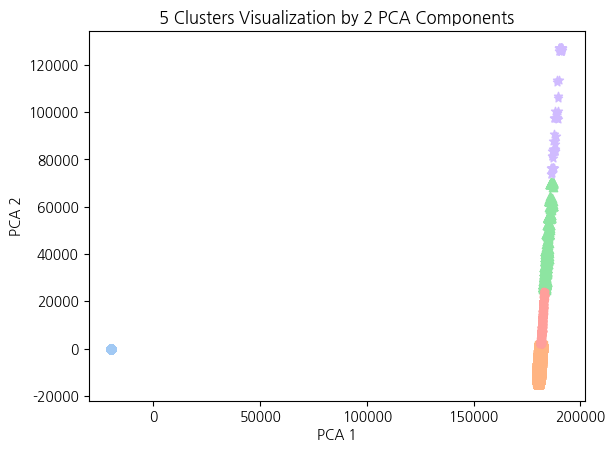

In [56]:
marker1_ind = df_Cluster[df_Cluster['ClusterKmeans']==1].index
marker2_ind = df_Cluster[df_Cluster['ClusterKmeans']==2].index
marker3_ind = df_Cluster[df_Cluster['ClusterKmeans']==3].index
marker4_ind = df_Cluster[df_Cluster['ClusterKmeans']==4].index
marker5_ind = df_Cluster[df_Cluster['ClusterKmeans']==5].index

plt.scatter(x=df_Cluster.loc[marker1_ind,'pca_x'], y=df_Cluster.loc[marker1_ind,'pca_y'], 
            marker='o') 
plt.scatter(x=df_Cluster.loc[marker2_ind,'pca_x'], y=df_Cluster.loc[marker2_ind,'pca_y'], 
            marker='s')
plt.scatter(x=df_Cluster.loc[marker3_ind,'pca_x'], y=df_Cluster.loc[marker3_ind,'pca_y'], 
            marker='^')
plt.scatter(x=df_Cluster.loc[marker4_ind,'pca_x'], y=df_Cluster.loc[marker4_ind,'pca_y'], 
            marker='.')
plt.scatter(x=df_Cluster.loc[marker5_ind,'pca_x'], y=df_Cluster.loc[marker5_ind,'pca_y'], 
            marker='*')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('5 Clusters Visualization by 2 PCA Components')
plt.show()

In [60]:
df_Cluster

,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,...,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_PLPY_CNT,AGE,TOT_INCM_drvd,FMLY_GDINS_MNPREM_drvd,FMLY_SVINS_MNPREM_drvd,ClusterKmeans
0,0,1,0,0,0,9001,9001,9001,0,1,...,0,0,10,0.0,0,50,77000,190.0,0.0,1
1,0,1,0,0,0,24001,0,24001,0,0,...,0,0,0,300.0,5,50,81000,110.0,0.0,1
2,0,0,1,3,2,15001,9001,0,3001,1,...,0,0,0,0.0,2,60,49000,0.0,0.0,1
3,1,0,2,4,2,6001,3001,0,3001,1,...,0,0,0,0.0,1,35,101000,0.0,0.0,1
4,0,4,0,0,0,21001,15001,21001,0,1,...,0,0,0,500.0,1,45,48000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98876,0,1,0,2,2,75001,15001,57001,0,37,...,0,0,1,700.0,3,55,129000,150.0,990.0,1
98877,0,2,0,0,0,54001,9001,54001,0,85,...,0,0,0,100.0,3,45,98000,230.0,0.0,1
98878,0,1,0,0,0,27001,27001,27001,0,1,...,0,0,1,0.0,4,45,104000,90.0,590.0,1
98879,0,0,0,1,1,57001,0,0,0,1,...,0,0,0,0.0,0,45,42000,40.0,0.0,1


In [59]:
df_Cluster.drop(['index', 'pca_x', 'pca_y'], axis = 1, inplace = True)

In [61]:
df_Cluster.to_csv("res_cluster.csv", index=False)